# Stack Overflow Developer Survey

---

## 0 - Introdução 

Nessa análise tentaremos entender as principais tendências da pesquisa realizada anualmente feita pelo Stack Overflow sobre salários dos desenvolvedores. A base pode ser acessada pelo link https://survey.stackoverflow.co.

___

## 1 - Importação das bibliotecas

Para realizar a análise será utilizado as bibliotecas:

- Pandas: Manipulação da base.
- Numpy: Funções matemáticas para facilitar manipulação.
- Matplotlib e Seaborn: Visualização gráfica.
- Re: Validação de regex.
- Requests: Fazer requisições http para alguma api.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests

# Definindo estilo do gráfico
plt.style.use("ggplot")

Estabelecendo a conexão com o banco de dados a partir da classe DB.

In [2]:
import sys
sys.path.append('..')
from db.database import DB

db = DB()

---

## 2 - Perguntas de negócio

### 2.1 - Público da pesquisa

#### ***Qual a distribuição do nível educacional?***

Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [3]:
df_edlevel_grouped = db.query_to_dataframe('SELECT "EdLevel" as nivel_educacional, COUNT("EdLevel") as total FROM survey WHERE "EdLevel" IS NOT NULL GROUP BY "EdLevel" ORDER BY total DESC;')
df_edlevel_grouped

,nivel_educacional,total
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36706
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20543
2,Some college/university study without earning ...,11753
3,"Secondary school (e.g. American high school, G...",8897
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3887
5,"Associate degree (A.A., A.S., etc.)",2807
6,Primary/elementary school,1905
7,Something else,1475


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por nível educacional'}, xlabel='Nível Educacional', ylabel='Total'>

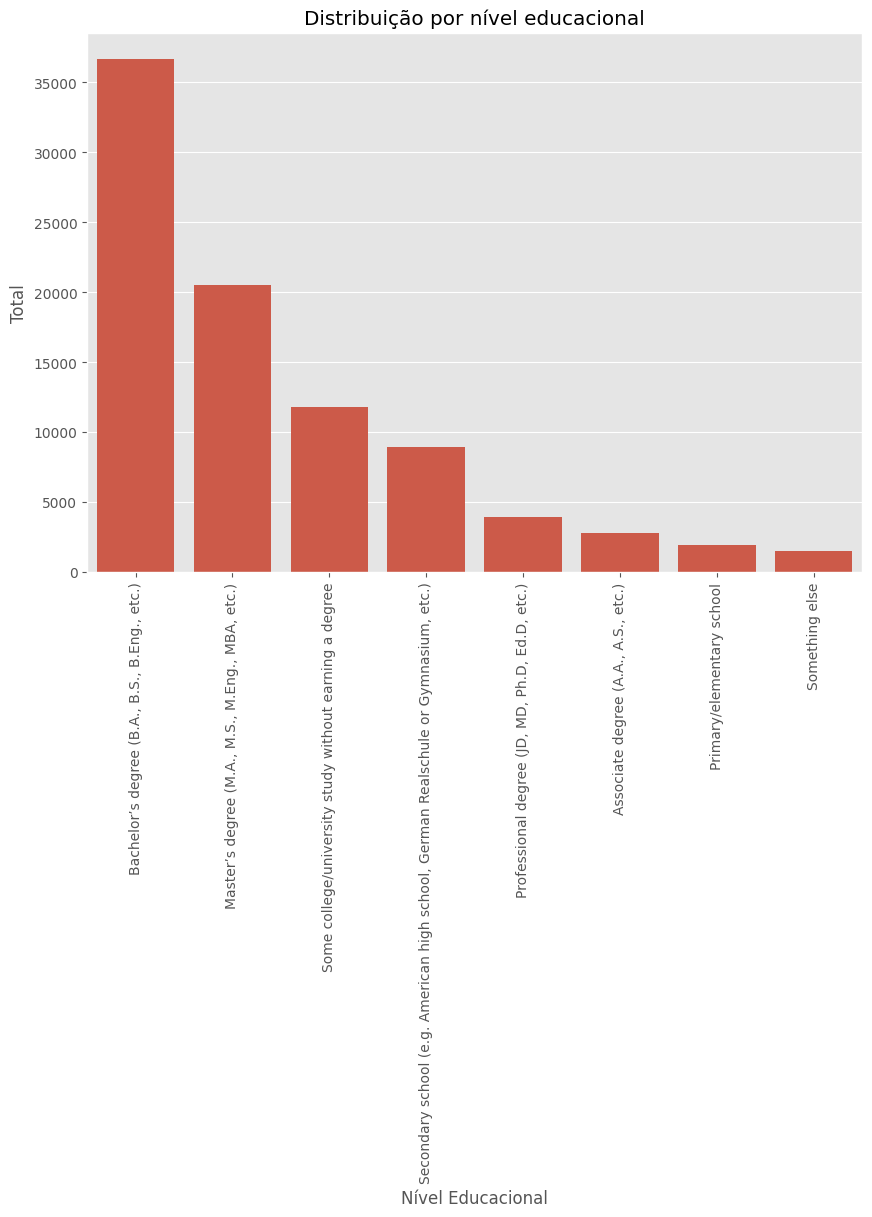

In [4]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por nível educacional")
_ = plt.xlabel("Nível Educacional")
_ = plt.ylabel("Total")
_ = plt.xticks(rotation=90)
sns.barplot(data = df_edlevel_grouped, x = 'nivel_educacional', y = 'total')

Gerando a medida da frequência relativa.

In [5]:
df_edlevel_grouped['frequencia_relativa_(%)'] = (df_edlevel_grouped['total'] / df_edlevel_grouped['total'].sum() * 100).round(2)
df_edlevel_grouped

,nivel_educacional,total,frequencia_relativa_(%)
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36706,41.72
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20543,23.35
2,Some college/university study without earning ...,11753,13.36
3,"Secondary school (e.g. American high school, G...",8897,10.11
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3887,4.42
5,"Associate degree (A.A., A.S., etc.)",2807,3.19
6,Primary/elementary school,1905,2.17
7,Something else,1475,1.68


41,72% dos entrevistados possuem um diploma de bacharel, seguidos por 23,35% possuindo um mestrado.

#### ***Qual a distribuição da idade?***

Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [6]:
df_age = db.query_to_dataframe('SELECT "Age" as idade, COUNT("Age") as total FROM survey WHERE "Age" IS NOT NULL GROUP BY idade ORDER BY total DESC;')
df_age

,idade,total
0,25-34 years old,33247
1,35-44 years old,20532
2,18-24 years old,17931
3,45-54 years old,8334
4,Under 18 years old,4128
5,55-64 years old,3392
6,65 years or older,1171
7,Prefer not to say,449


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por idade'}, xlabel='Idade', ylabel='Total'>

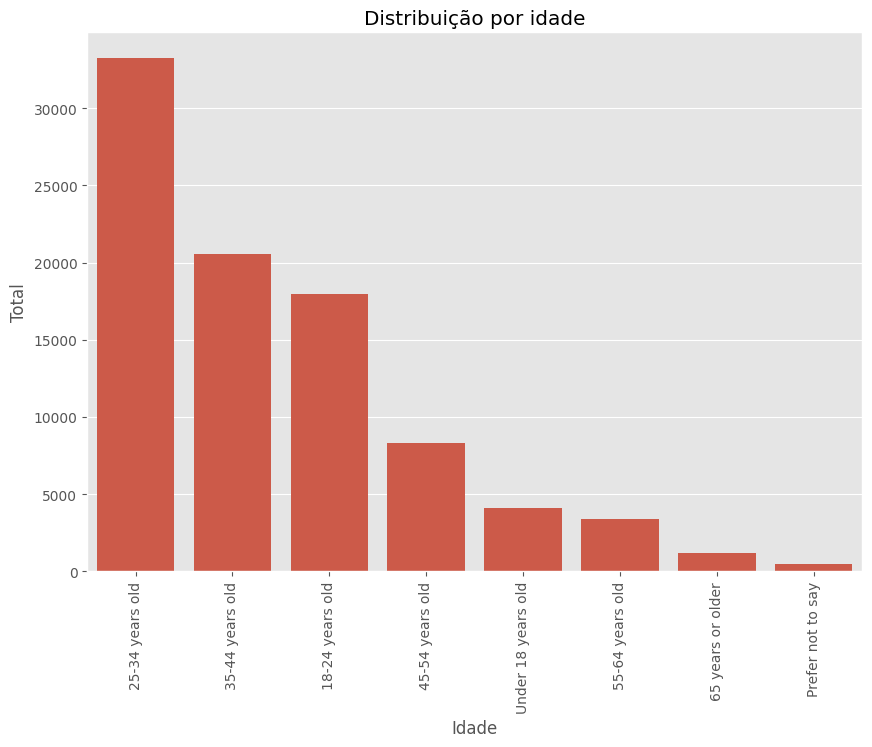

In [7]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por idade")
_ = plt.xlabel("Idade")
_ = plt.ylabel("Total")
_ = plt.xticks(rotation=90)
sns.barplot(data = df_age, x = 'idade', y = 'total')

Gerando a medida da frequência relativa.

In [8]:
df_age['frequencia_relativa_(%)'] = (df_age['total'] / df_age['total'].sum() * 100).round(2)
df_age

,idade,total,frequencia_relativa_(%)
0,25-34 years old,33247,37.28
1,35-44 years old,20532,23.02
2,18-24 years old,17931,20.11
3,45-54 years old,8334,9.34
4,Under 18 years old,4128,4.63
5,55-64 years old,3392,3.80
6,65 years or older,1171,1.31
7,Prefer not to say,449,0.50


37,28% dos entrevistados estão na faixa etária dos 25 até os 34 anos, 23,02% na faixa etária dos 35 até os 44 anos e 20,11% na faixa dos 18 até os 24 anos.

#### ***Qual a distribuição por status de empregabilidade?***

Filtrando todas as respostas em valores unicos, separando os valores após o ;

In [9]:
df_employment_status = db.query_to_dataframe("""
    SELECT DISTINCT TRIM(value) AS empregabilidade
    FROM (
        SELECT regexp_split_to_table("Employment", ';') AS value
        FROM survey
    ) AS subquery;
""")
df_employment_status

,empregabilidade
0,"Student, full-time"
1,"Not employed, and not looking for work"
2,"Not employed, but looking for work"
3,"Independent contractor, freelancer, or self-em..."
4,"Employed, full-time"
5,"Student, part-time"
6,"Employed, part-time"
7,I prefer not to say
8,Retired


Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [10]:
empregabilidade_values = df_employment_status['empregabilidade'].tolist()

case_when_clause = ""
for value in empregabilidade_values:
    case_when_clause += f"WHEN \"Employment\" LIKE '%%{value}%%' THEN '{value}'\n"

query = f"""
SELECT 
    CASE 
        {case_when_clause} ELSE 'Other'
    END as empregabilidade,
    COUNT(*) as total
FROM survey 
WHERE "Employment" IS NOT NULL 
GROUP BY empregabilidade 
ORDER BY total DESC;
"""

df_employment_grouped = db.query_to_dataframe(query)
df_employment_grouped

,empregabilidade,total
0,"Employed, full-time",55043
1,"Independent contractor, freelancer, or self-em...",12533
2,"Student, full-time",11768
3,"Not employed, but looking for work",3257
4,"Employed, part-time",1664
5,"Student, part-time",1450
6,"Not employed, and not looking for work",1064
7,Retired,570
8,I prefer not to say,549


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por empregabilidade'}, xlabel='Empregabilidade', ylabel='Total'>

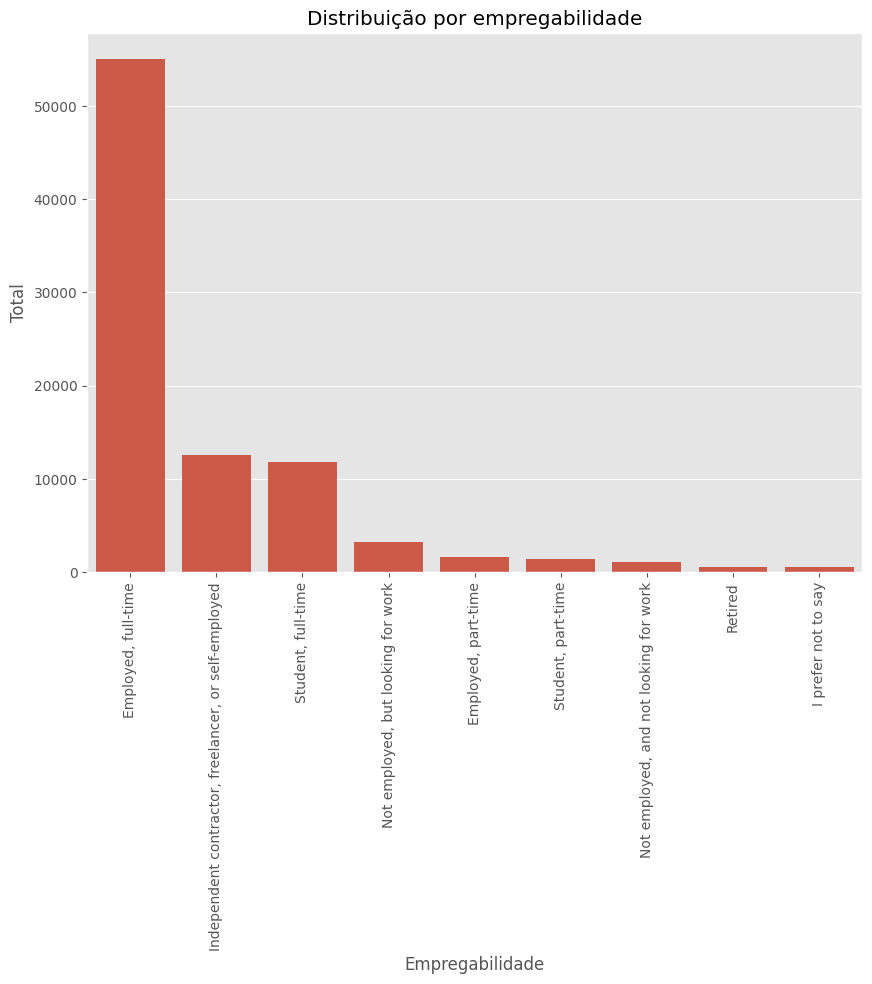

In [11]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por empregabilidade")
_ = plt.xlabel("Empregabilidade")
_ = plt.ylabel("Total")
_ = plt.xticks(rotation=90)
sns.barplot(data = df_employment_grouped, x = 'empregabilidade', y = 'total')

Gerando a medida da frequência relativa.

In [12]:
df_employment_grouped['frequencia_relativa_(%)'] = (df_employment_grouped['total'] / df_employment_grouped['total'].sum() * 100).round(2)
df_employment_grouped

,empregabilidade,total,frequencia_relativa_(%)
0,"Employed, full-time",55043,62.62
1,"Independent contractor, freelancer, or self-em...",12533,14.26
2,"Student, full-time",11768,13.39
3,"Not employed, but looking for work",3257,3.71
4,"Employed, part-time",1664,1.89
5,"Student, part-time",1450,1.65
6,"Not employed, and not looking for work",1064,1.21
7,Retired,570,0.65
8,I prefer not to say,549,0.62


62,62% dos entrevistados estão empregados e trabalhando uma jornada de trabalho completa, 14,26% como freelancer ou consultores e 13,39% como estudantes em período integral.

#### ***Qual a distribuição por modalidade de emprego?***

Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [13]:
df_remote_work_groupped = db.query_to_dataframe('SELECT "RemoteWork" as modalidade_emprego, COUNT("RemoteWork") as total FROM survey WHERE "RemoteWork" IS NOT NULL GROUP BY modalidade_emprego ORDER BY total DESC;')
df_remote_work_groupped

,modalidade_emprego,total
0,"Hybrid (some remote, some in-person)",31131
1,Remote,30566
2,In-person,12113


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por modalidade de emprego'}, xlabel='Modalidade de emprego', ylabel='Total'>

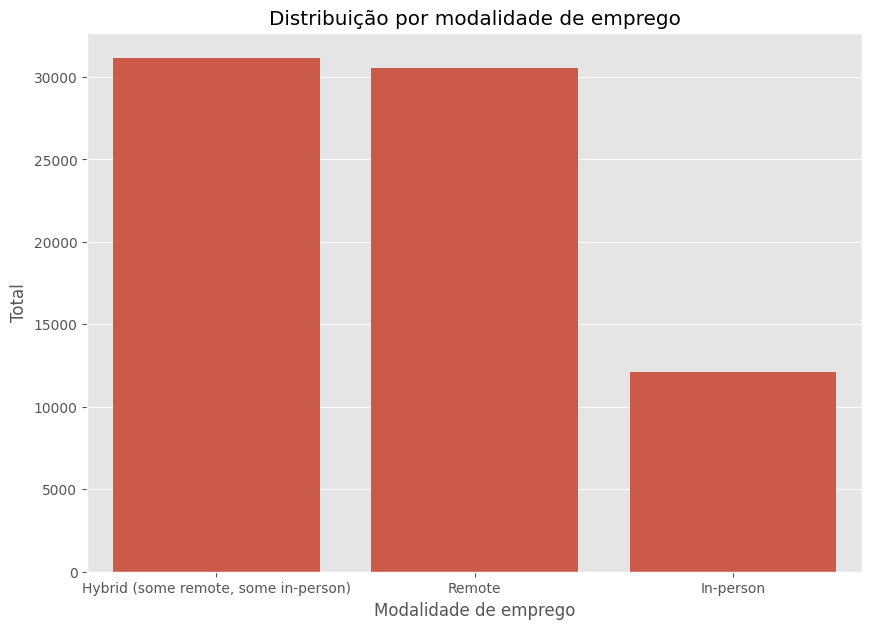

In [14]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por modalidade de emprego")
_ = plt.xlabel("Modalidade de emprego")
_ = plt.ylabel("Total")
sns.barplot(data = df_remote_work_groupped, x = 'modalidade_emprego', y = 'total')

Gerando a medida da frequência relativa.

In [15]:
df_remote_work_groupped['frequencia_relativa_(%)'] = (df_remote_work_groupped['total'] / df_remote_work_groupped['total'].sum() * 100).round(2)
df_remote_work_groupped

,modalidade_emprego,total,frequencia_relativa_(%)
0,"Hybrid (some remote, some in-person)",31131,42.18
1,Remote,30566,41.41
2,In-person,12113,16.41


42,18% dos entrevistados trabalham no modelo híbrido, 41,41% no modelo remoto e apenas 16,41% no modelo presencial.

### 2.2 - Estudo, trabalho e carreira

#### ***Qual a forma mais utilizada para estudar?***

Filtrando todas as respostas em valores unicos, separando os valores após o ;

In [16]:
df_learn_code_type = db.query_to_dataframe("""
    SELECT DISTINCT TRIM(value) AS formas_de_estudar
    FROM (
        SELECT regexp_split_to_table("LearnCode", ';') AS value
        FROM survey
    ) AS subquery;
""")
df_learn_code_type

,formas_de_estudar
0,"Other online resources (e.g., videos, blogs, f..."
1,Books / Physical media
2,Hackathons (virtual or in-person)
3,Coding Bootcamp
4,Online Courses or Certification
5,On the job training
6,Friend or family member
7,Colleague
8,Other (please specify):
9,"School (i.e., University, College, etc)"


Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [17]:
learn_code_type_values = df_learn_code_type['formas_de_estudar'].tolist()

case_when_clause = ""
for value in learn_code_type_values:
    case_when_clause += f"WHEN \"LearnCode\" LIKE '%%{value}%%' THEN '{value}'\n"

query = f"""
SELECT 
    CASE 
        {case_when_clause} ELSE 'Other'
    END as formas_de_estudar,
    COUNT(*) as total
FROM survey 
WHERE "LearnCode" IS NOT NULL 
GROUP BY formas_de_estudar 
ORDER BY total DESC;
"""

df_learn_code_grouped = db.query_to_dataframe(query)
df_learn_code_grouped

,formas_de_estudar,total
0,"Other online resources (e.g., videos, blogs, f...",70244
1,Books / Physical media,8334
2,Online Courses or Certification,2472
3,"School (i.e., University, College, etc)",2162
4,On the job training,1798
5,Coding Bootcamp,897
6,Other (please specify):,800
7,Hackathons (virtual or in-person),475
8,Friend or family member,247
9,Colleague,234


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por formas de estudo'}, xlabel='Formas de Estudo', ylabel='Total'>

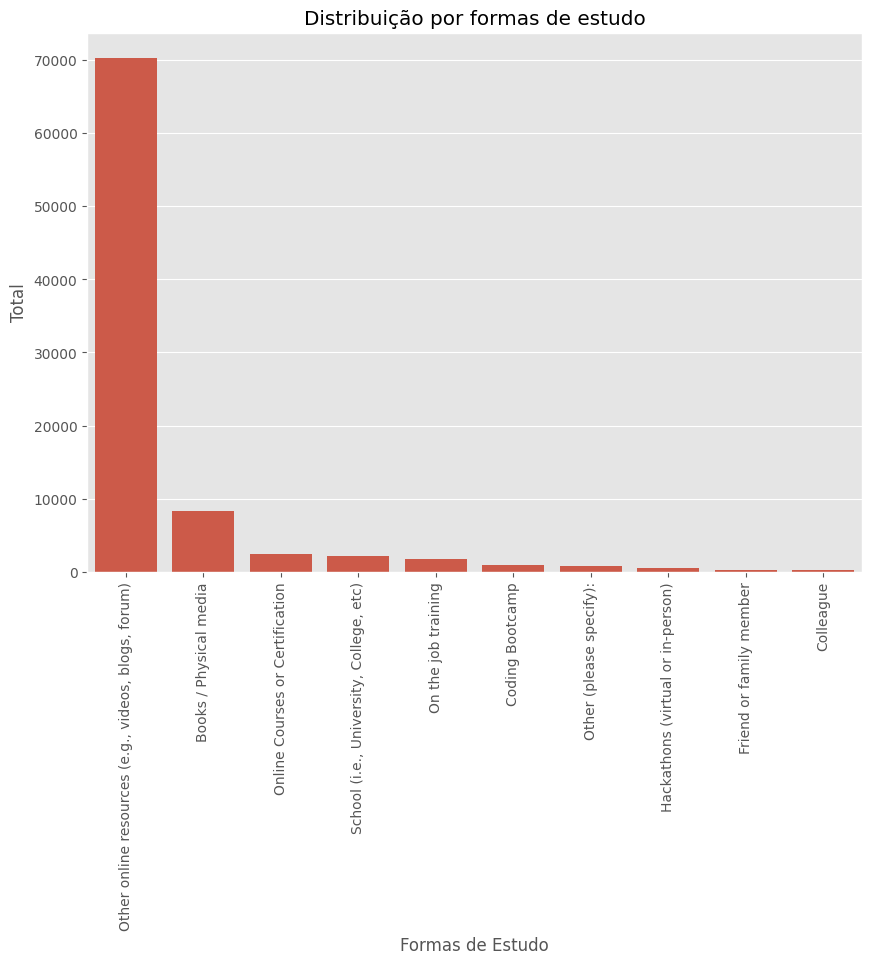

In [18]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por formas de estudo")
_ = plt.xlabel("Formas de Estudo")
_ = plt.ylabel("Total")
_ = plt.xticks(rotation = 90)
sns.barplot(data = df_learn_code_grouped, x = 'formas_de_estudar', y = 'total')

Gerando a medida da frequência relativa.

In [19]:
df_learn_code_grouped['frequencia_relativa_(%)'] = (df_learn_code_grouped['total'] / df_learn_code_grouped['total'].sum() * 100).round(2)
df_learn_code_grouped

,formas_de_estudar,total,frequencia_relativa_(%)
0,"Other online resources (e.g., videos, blogs, f...",70244,80.13
1,Books / Physical media,8334,9.51
2,Online Courses or Certification,2472,2.82
3,"School (i.e., University, College, etc)",2162,2.47
4,On the job training,1798,2.05
5,Coding Bootcamp,897,1.02
6,Other (please specify):,800,0.91
7,Hackathons (virtual or in-person),475,0.54
8,Friend or family member,247,0.28
9,Colleague,234,0.27


80,13% dos entrevistados prefere recursos online para estudar como vídeos, blogs, etc.

#### ***Quais cursos ou certificações online foram mais utilizadas?***

Filtrando todas as respostas em valores unicos, separando os valores após o ;

In [20]:
df_certifications = db.query_to_dataframe("""
    SELECT DISTINCT TRIM(value) AS certificacoes
    FROM (
        SELECT regexp_split_to_table("LearnCodeCoursesCert", ';') AS value
        FROM survey
    ) AS subquery;
""")
df_certifications

,certificacoes
0,Other
1,Skillsoft
2,Udacity
3,Codecademy
4,Coursera
5,Pluralsight
6,edX
7,Udemy


Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [21]:
certifications_values = df_certifications['certificacoes'].tolist()

case_when_clause = ""
for value in certifications_values:
    case_when_clause += f"WHEN \"LearnCodeCoursesCert\" LIKE '%%{value}%%' THEN '{value}'\n"

query = f"""
SELECT 
    CASE 
        {case_when_clause} ELSE 'Other'
    END as certificacoes,
    COUNT(*) as total
FROM survey 
WHERE "LearnCodeCoursesCert" IS NOT NULL 
GROUP BY certificacoes 
ORDER BY total DESC;
"""

df_certifications_grouped = db.query_to_dataframe(query)
df_certifications_grouped

,certificacoes,total
0,Other,7811
1,Udemy,7445
2,Coursera,6749
3,Codecademy,6351
4,Pluralsight,3753
5,Udacity,3417
6,edX,892
7,Skillsoft,658


Plotando o gráfico visualizar a distribuição.

<Axes: title={'center': 'Distribuição por certificações realizadas'}, xlabel='Certificações', ylabel='Total'>

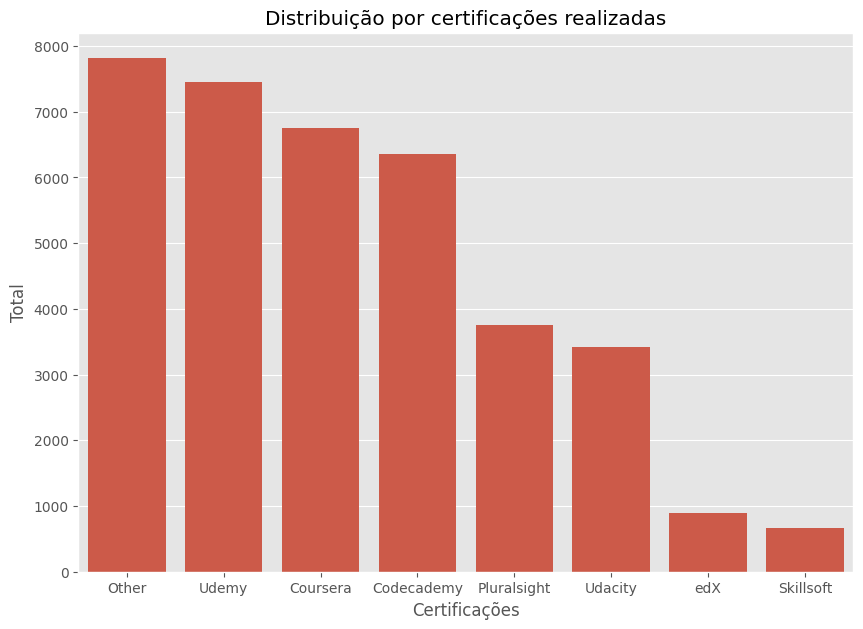

In [22]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por certificações realizadas")
_ = plt.xlabel("Certificações")
_ = plt.ylabel("Total")
sns.barplot(data = df_certifications_grouped, x = 'certificacoes', y = 'total')

Gerando a medida da frequência relativa.

In [23]:
df_certifications_grouped['frequencia_relativa_(%)'] = (df_certifications_grouped['total'] / df_certifications_grouped['total'].sum() * 100).round(2)
df_certifications_grouped

,certificacoes,total,frequencia_relativa_(%)
0,Other,7811,21.07
1,Udemy,7445,20.08
2,Coursera,6749,18.20
3,Codecademy,6351,17.13
4,Pluralsight,3753,10.12
5,Udacity,3417,9.22
6,edX,892,2.41
7,Skillsoft,658,1.77


20,08% dos entrevistados fizeram certificações pela Udemy, 18,20% pela Coursera e 17,13% pela Codeacademy.

#### ***Qual a quantidade por senoridade? (Dividir em júnior, pleno e sênior)***

Usar:
- Júnior: 0 a 3 anos
- Pleno: 4 a 7 anos
- Sênior: Mais de 7 anos

Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [24]:
df_years_code_pro = db.query_to_dataframe("""
SELECT 
    "YearsCodePro" AS total_anos_codando,
    CASE 
        WHEN "YearsCodePro" = 'Less than 1 year' THEN 'Júnior'
        WHEN CAST("YearsCodePro" AS INTEGER) <= 3 THEN 'Júnior'
        WHEN CAST("YearsCodePro" AS INTEGER) <= 6 THEN 'Pleno'
        WHEN CAST("YearsCodePro" AS INTEGER) > 6 THEN 'Sênior'
        WHEN "YearsCodePro" = 'More than 50 years' THEN 'Sênior'
        ELSE 'Outro'
    END AS senioridade
FROM survey 
WHERE "YearsCodePro" IS NOT NULL
  AND "YearsCodePro" <> 'More than 50 years';
                                          """)
df_years_code_pro

,total_anos_codando,senioridade
0,2,Júnior
1,9,Sênior
2,14,Sênior
3,26,Sênior
4,24,Sênior
...,...,...
66048,5,Pleno
66049,21,Sênior
66050,19,Sênior
66051,Less than 1 year,Júnior


Agrupando os dados pela senoriedade.

In [25]:
df_years_code_pro_values = df_years_code_pro['senioridade'].value_counts().reset_index()
df_years_code_pro_values

,senioridade,count
0,Sênior,40380
1,Júnior,13274
2,Pleno,12399


Plotando o gráfico para ver a distribuição.

<Axes: title={'center': 'Distribuição por senioridade'}, xlabel='Senioridade', ylabel='Total'>

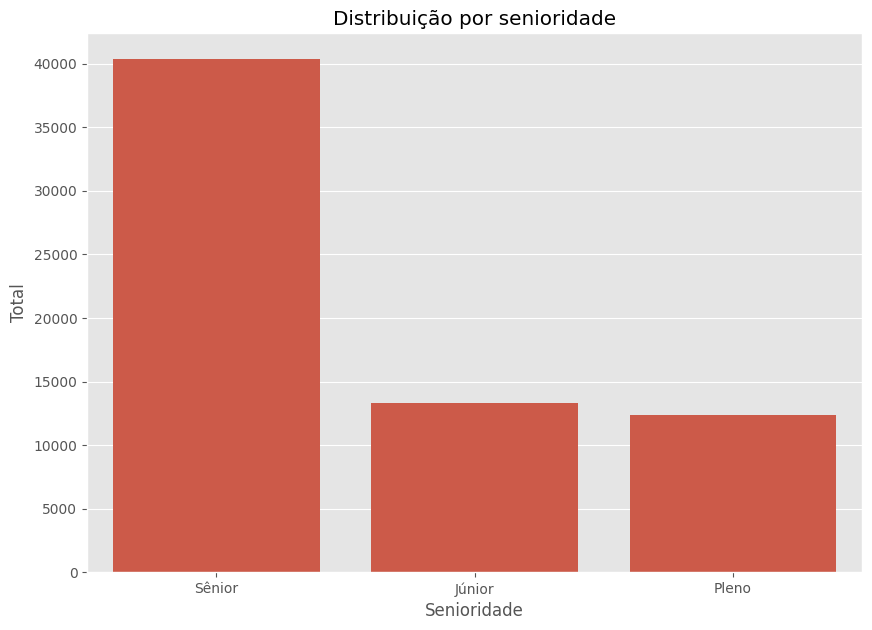

In [26]:
_ = plt.figure(figsize=(10, 7))
_ = plt.title("Distribuição por senioridade")
_ = plt.xlabel("Senioridade")
_ = plt.ylabel("Total")
sns.barplot(data = df_years_code_pro_values, x = 'senioridade', y = 'count')

Gerando a medida da frequência relativa.

In [27]:
df_years_code_pro_values['frequencia_relativa_(%)'] = (df_years_code_pro_values['count'] / df_years_code_pro_values['count'].sum() * 100).round(2)
df_years_code_pro_values

,senioridade,count,frequencia_relativa_(%)
0,Sênior,40380,61.13
1,Júnior,13274,20.10
2,Pleno,12399,18.77


61,13% dos entrevistados são sêniors, 20,10% são júniors e 18,77% são considerados plenos.

#### ***Quais os cargos mais populares?***

Executando a query conectando no banco de dados e retornando o resultado num dataframe.

In [28]:
df_devtype_grouped = db.query_to_dataframe('SELECT "DevType" as cargo, COUNT("DevType") as total FROM survey WHERE "DevType" IS NOT NULL GROUP BY "DevType" ORDER BY total DESC;')
df_devtype_grouped

,cargo,total
0,"Developer, full-stack",25735
1,"Developer, back-end",13745
2,"Developer, front-end",5071
3,"Developer, desktop or enterprise applications",3904
4,Other (please specify):,3080
5,"Developer, mobile",2597
6,Engineering manager,2033
7,Student,1996
8,"Developer, embedded applications or devices",1845
9,Data scientist or machine learning specialist,1588


Plotando o gráfico para ver a distribuição.

<Axes: title={'center': 'Distribuição por cargo'}, xlabel='Cargo', ylabel='Total'>

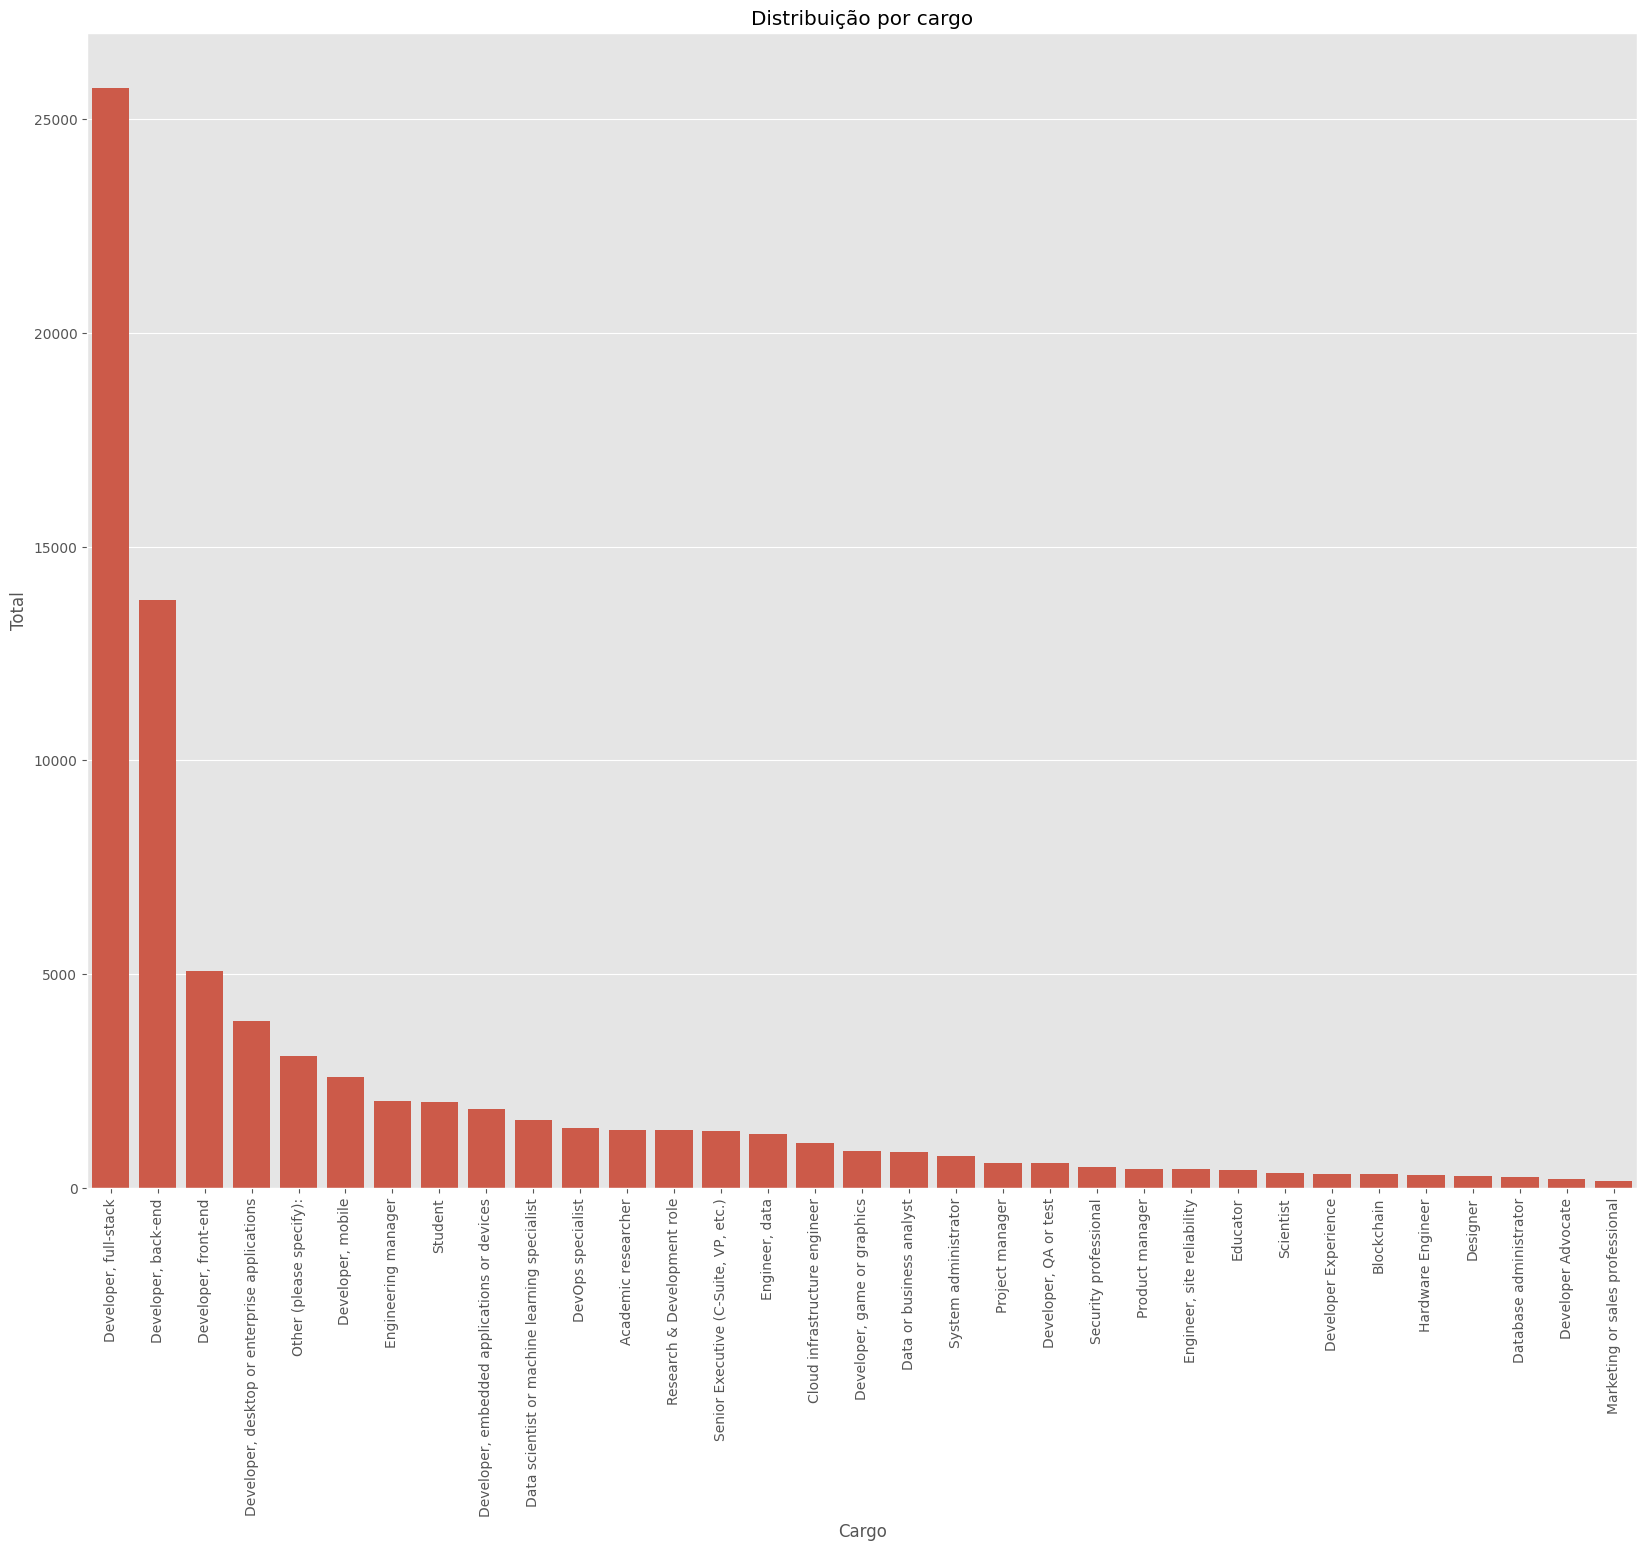

In [29]:
_ = plt.figure(figsize=(20, 15))
_ = plt.title("Distribuição por cargo")
_ = plt.xlabel("Cargo")
_ = plt.ylabel("Total")
_ = plt.xticks(rotation=90)
sns.barplot(data = df_devtype_grouped, x = 'cargo', y = 'total')

Gerando a medida da frequência relativa.

In [30]:
df_devtype_grouped['frequencia_relativa_(%)'] = (df_devtype_grouped['total'] / df_devtype_grouped['total'].sum() * 100).round(2)
df_devtype_grouped

,cargo,total,frequencia_relativa_(%)
0,"Developer, full-stack",25735,33.48
1,"Developer, back-end",13745,17.88
2,"Developer, front-end",5071,6.60
3,"Developer, desktop or enterprise applications",3904,5.08
4,Other (please specify):,3080,4.01
5,"Developer, mobile",2597,3.38
6,Engineering manager,2033,2.64
7,Student,1996,2.60
8,"Developer, embedded applications or devices",1845,2.40
9,Data scientist or machine learning specialist,1588,2.07


A maior parte dos entrevistados são desenvolvedor web dividos em:
- Fullstack: 33,48%
- Backend: 17,88%
- Frontend: 6,60%

#### ***Qual o salário médio por cargo? Existe correlação com a idade, escolaridade, modalidade e senioridade? Verifique todos os pontos no Brasil***

Executando a query e retornando o resultado do banco de dados num dataframe.

In [31]:
df_salaries = db.query_to_dataframe("""SELECT "CompTotal" as salario, "Currency" as moeda, "Country" as país, "DevType" as cargo, "Age" as idade, "YearsCodePro" as anos_codando, "EdLevel" as escolaridade, "RemoteWork" as modalidade FROM survey WHERE "CompTotal" IS NOT NULL AND "Country" = 'Brazil' AND "Currency" = 'BRL\tBrazilian real';""")
df_salaries

,salario,moeda,país,cargo,idade,anos_codando,escolaridade,modalidade
0,110400.0,BRL\tBrazilian real,Brazil,"Developer, full-stack",25-34 years old,15,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote
1,40000.0,BRL\tBrazilian real,Brazil,"Developer, desktop or enterprise applications",25-34 years old,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",In-person
2,480000.0,BRL\tBrazilian real,Brazil,DevOps specialist,25-34 years old,15,"Secondary school (e.g. American high school, G...",Remote
3,400000.0,BRL\tBrazilian real,Brazil,"Developer, back-end",25-34 years old,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote
4,84314.0,BRL\tBrazilian real,Brazil,"Developer, full-stack",35-44 years old,15,Some college/university study without earning ...,"Hybrid (some remote, some in-person)"
...,...,...,...,...,...,...,...,...
1163,140000.0,BRL\tBrazilian real,Brazil,"Developer, full-stack",35-44 years old,23,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote
1164,70502.0,BRL\tBrazilian real,Brazil,"Developer, full-stack",18-24 years old,5,"Associate degree (A.A., A.S., etc.)","Hybrid (some remote, some in-person)"
1165,280000.0,BRL\tBrazilian real,Brazil,"Developer, desktop or enterprise applications",25-34 years old,3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)"
1166,220000.0,BRL\tBrazilian real,Brazil,"Developer, full-stack",25-34 years old,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote


Extraindo os 3 primeiros dígitos da moeda.

In [32]:
def extract_currency(moeda):
    match = re.match(r'^[A-Za-z]{3}', moeda)
    if match:
        return match.group(0)
    else:
        return None

df_salaries['moeda'] = df_salaries['moeda'].apply(extract_currency)
df_salaries

,salario,moeda,país,cargo,idade,anos_codando,escolaridade,modalidade
0,110400.0,BRL,Brazil,"Developer, full-stack",25-34 years old,15,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote
1,40000.0,BRL,Brazil,"Developer, desktop or enterprise applications",25-34 years old,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",In-person
2,480000.0,BRL,Brazil,DevOps specialist,25-34 years old,15,"Secondary school (e.g. American high school, G...",Remote
3,400000.0,BRL,Brazil,"Developer, back-end",25-34 years old,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote
4,84314.0,BRL,Brazil,"Developer, full-stack",35-44 years old,15,Some college/university study without earning ...,"Hybrid (some remote, some in-person)"
...,...,...,...,...,...,...,...,...
1163,140000.0,BRL,Brazil,"Developer, full-stack",35-44 years old,23,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote
1164,70502.0,BRL,Brazil,"Developer, full-stack",18-24 years old,5,"Associate degree (A.A., A.S., etc.)","Hybrid (some remote, some in-person)"
1165,280000.0,BRL,Brazil,"Developer, desktop or enterprise applications",25-34 years old,3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)"
1166,220000.0,BRL,Brazil,"Developer, full-stack",25-34 years old,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote


Convertendo os anos de trabalho em status de senioridade.

In [33]:
def convert_to_seniority(anos):
    if anos == "Less than 1 year":
        return "Júnior"
    elif anos == "More than 50 years":
        return "Sênior"
    elif anos is not None:
        anos_int = int(anos)
        if anos_int <= 3:
            return "Júnior"
        elif anos_int <= 7:
            return "Pleno"
        else:
            return "Sênior"
    else:
        return "Não especificado"

df_salaries['senioridade'] = df_salaries['anos_codando'].apply(convert_to_seniority)
df_salaries

,salario,moeda,país,cargo,idade,anos_codando,escolaridade,modalidade,senioridade
0,110400.0,BRL,Brazil,"Developer, full-stack",25-34 years old,15,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,Sênior
1,40000.0,BRL,Brazil,"Developer, desktop or enterprise applications",25-34 years old,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",In-person,Pleno
2,480000.0,BRL,Brazil,DevOps specialist,25-34 years old,15,"Secondary school (e.g. American high school, G...",Remote,Sênior
3,400000.0,BRL,Brazil,"Developer, back-end",25-34 years old,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,Sênior
4,84314.0,BRL,Brazil,"Developer, full-stack",35-44 years old,15,Some college/university study without earning ...,"Hybrid (some remote, some in-person)",Sênior
...,...,...,...,...,...,...,...,...,...
1163,140000.0,BRL,Brazil,"Developer, full-stack",35-44 years old,23,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,Sênior
1164,70502.0,BRL,Brazil,"Developer, full-stack",18-24 years old,5,"Associate degree (A.A., A.S., etc.)","Hybrid (some remote, some in-person)",Pleno
1165,280000.0,BRL,Brazil,"Developer, desktop or enterprise applications",25-34 years old,3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)",Júnior
1166,220000.0,BRL,Brazil,"Developer, full-stack",25-34 years old,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,Pleno


**Por Cargo**

In [34]:
df_salaries['salario_mensal'] = df_salaries['salario'] / 12
df_cargo_por_salario = df_salaries.groupby('cargo').agg({'salario_mensal': 'mean', 'salario': 'count'}).reset_index()
df_cargo_por_salario = df_cargo_por_salario.rename(columns={'salario_mensal': 'salario_medio_mensal', 'salario': 'contagem'})
df_cargo_por_salario = df_cargo_por_salario.sort_values(by='salario_medio_mensal', ascending=False)
df_cargo_por_salario

,cargo,salario_medio_mensal,contagem
20,"Engineer, site reliability",181252.333333,9
19,"Engineer, data",54685.435185,18
17,"Developer, mobile",37503.525641,39
8,Developer Advocate,34305.555556,3
1,Blockchain,33333.333333,1
30,"Senior Executive (C-Suite, VP, etc.)",31162.037037,18
21,Engineering manager,27163.780864,27
27,Research & Development role,21759.888889,15
11,"Developer, back-end",18964.139091,275
15,"Developer, full-stack",18731.778854,413


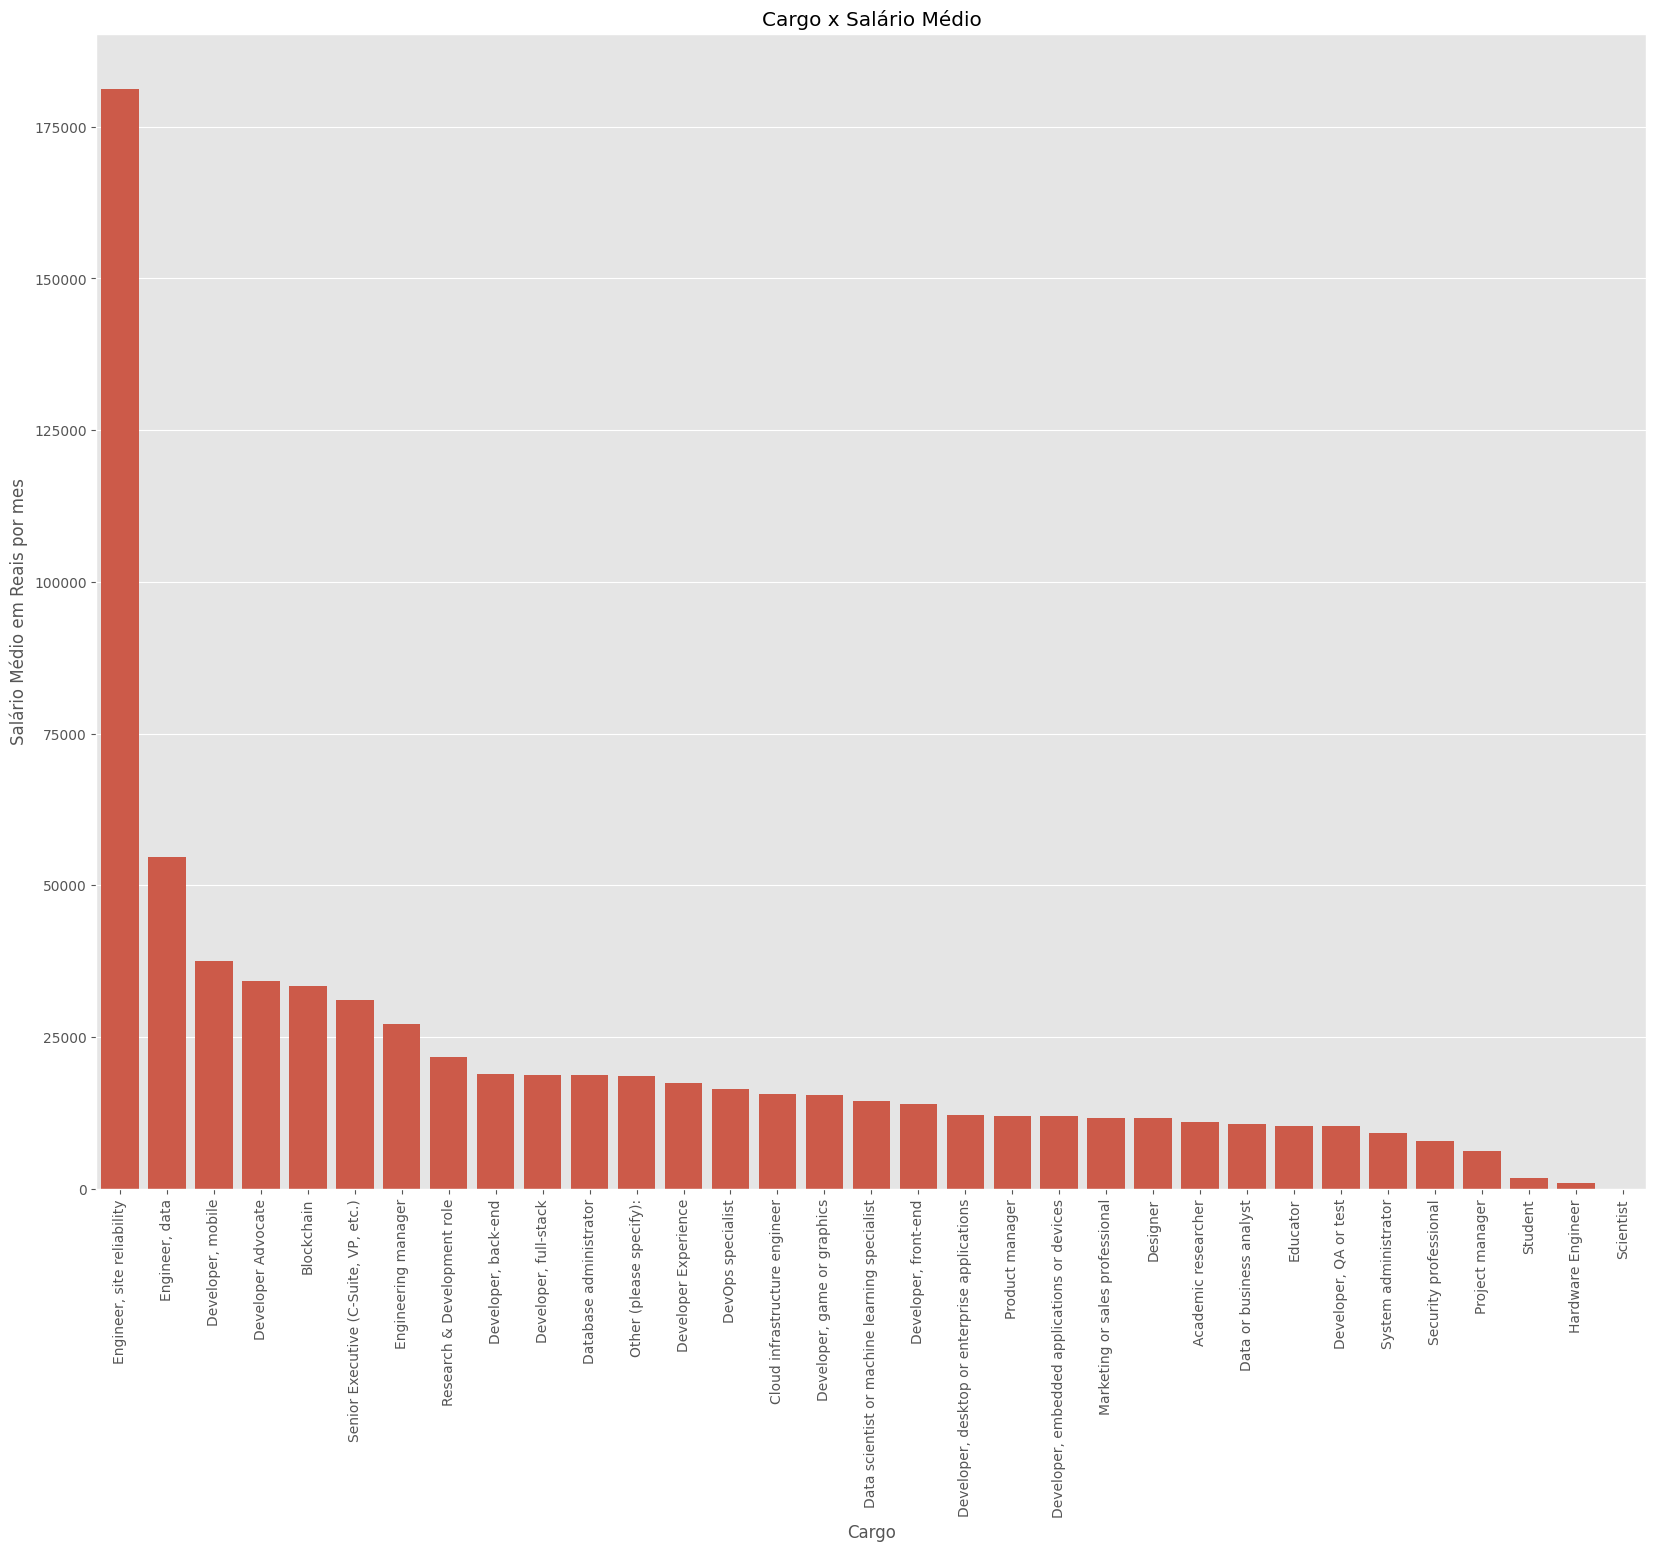

In [35]:
_ = plt.figure(figsize=(20, 15))
_ = plt.title("Cargo x Salário Médio")
_ = plt.xlabel("Cargo")
_ = plt.ylabel("Salário Médio em Reais por mes")
_ = plt.xticks(rotation=90)
_ = sns.barplot(data = df_cargo_por_salario, x = 'cargo', y = 'salario_medio_mensal')

O cargo que melhor está pagando é engenheiro que garante o funcionamento de uma empresa inteira, porém, a amostragem é muito baixa. Com a amostragem mais alta, Desenvolvedor backend em média está pagando quase 19 mil reais e o fullstack em média está ganhando cerca de 18 mil e 800 reais por mês.

**Por Idade**

Filtrando o dataset pela média do salario e contando o total de pessoas.

In [36]:
df_salaries['salario_mensal'] = df_salaries['salario'] / 12
df_idade_por_salario = df_salaries.groupby('idade').agg({'salario_mensal': 'mean', 'salario': 'count'}).reset_index()
df_idade_por_salario = df_idade_por_salario.rename(columns={'salario_mensal': 'salario_medio_mensal', 'salario': 'contagem'})
df_idade_por_salario = df_idade_por_salario.sort_values(by='salario_medio_mensal', ascending=False)
df_idade_por_salario

,idade,salario_medio_mensal,contagem
4,55-64 years old,66320.512821,13
3,45-54 years old,34892.582483,98
2,35-44 years old,22967.086369,302
6,Under 18 years old,21700.000000,1
1,25-34 years old,17364.119559,582
0,18-24 years old,12480.530258,168
5,65 years or older,8750.000000,4


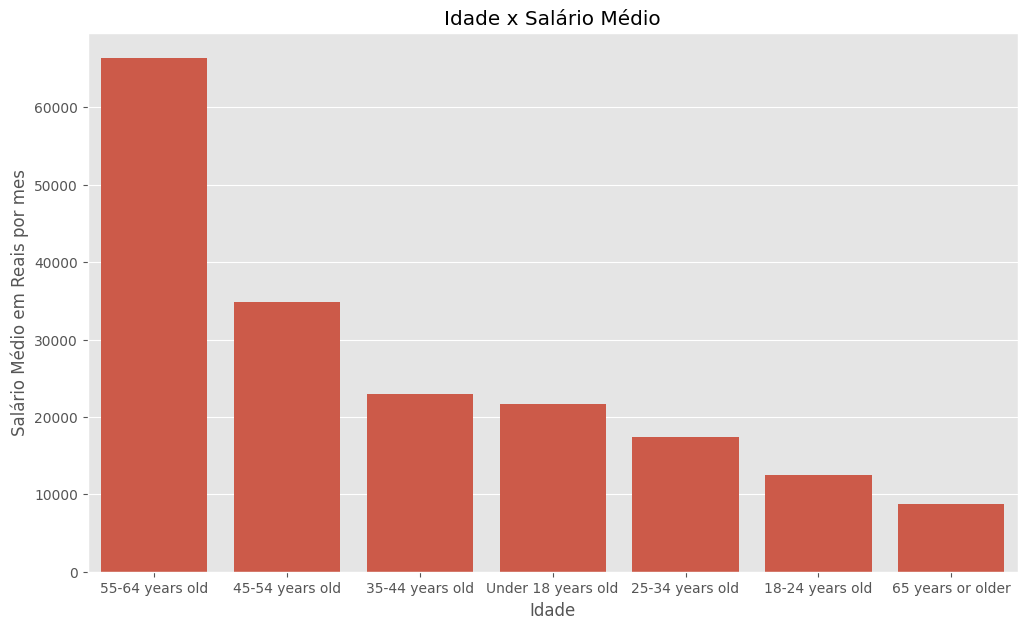

In [37]:
_ = plt.figure(figsize=(12, 7))
_ = plt.title("Idade x Salário Médio")
_ = plt.xlabel("Idade")
_ = plt.ylabel("Salário Médio em Reais por mes")
_ = sns.barplot(data = df_idade_por_salario, x = 'idade', y = 'salario_medio_mensal')

Podemos afirmar que existe uma correção entre idade e o salário médio mensal, uma vez que pessoas no auge da carreira estão ganhando mais do aquelas que estão começando ainda.

**Por Escolaridade**

Filtrando o dataset pela média do salario e contando o total de pessoas.

In [38]:
df_salaries['salario_mensal'] = df_salaries['salario'] / 12
df_escolaridade_por_salario = df_salaries.groupby('escolaridade').agg({'salario_mensal': 'mean', 'salario': 'count'}).reset_index()
df_escolaridade_por_salario = df_escolaridade_por_salario.rename(columns={'salario_mensal': 'salario_medio_mensal', 'salario': 'contagem'})
df_escolaridade_por_salario = df_escolaridade_por_salario.sort_values(by='salario_medio_mensal', ascending=False)
df_escolaridade_por_salario

,escolaridade,salario_medio_mensal,contagem
0,"Associate degree (A.A., A.S., etc.)",27950.294118,68
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27762.795580,181
7,Something else,23770.944444,6
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",19789.969220,620
5,"Secondary school (e.g. American high school, G...",19018.439394,55
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",16523.242284,54
6,Some college/university study without earning ...,12030.475599,181
3,Primary/elementary school,7722.861111,3


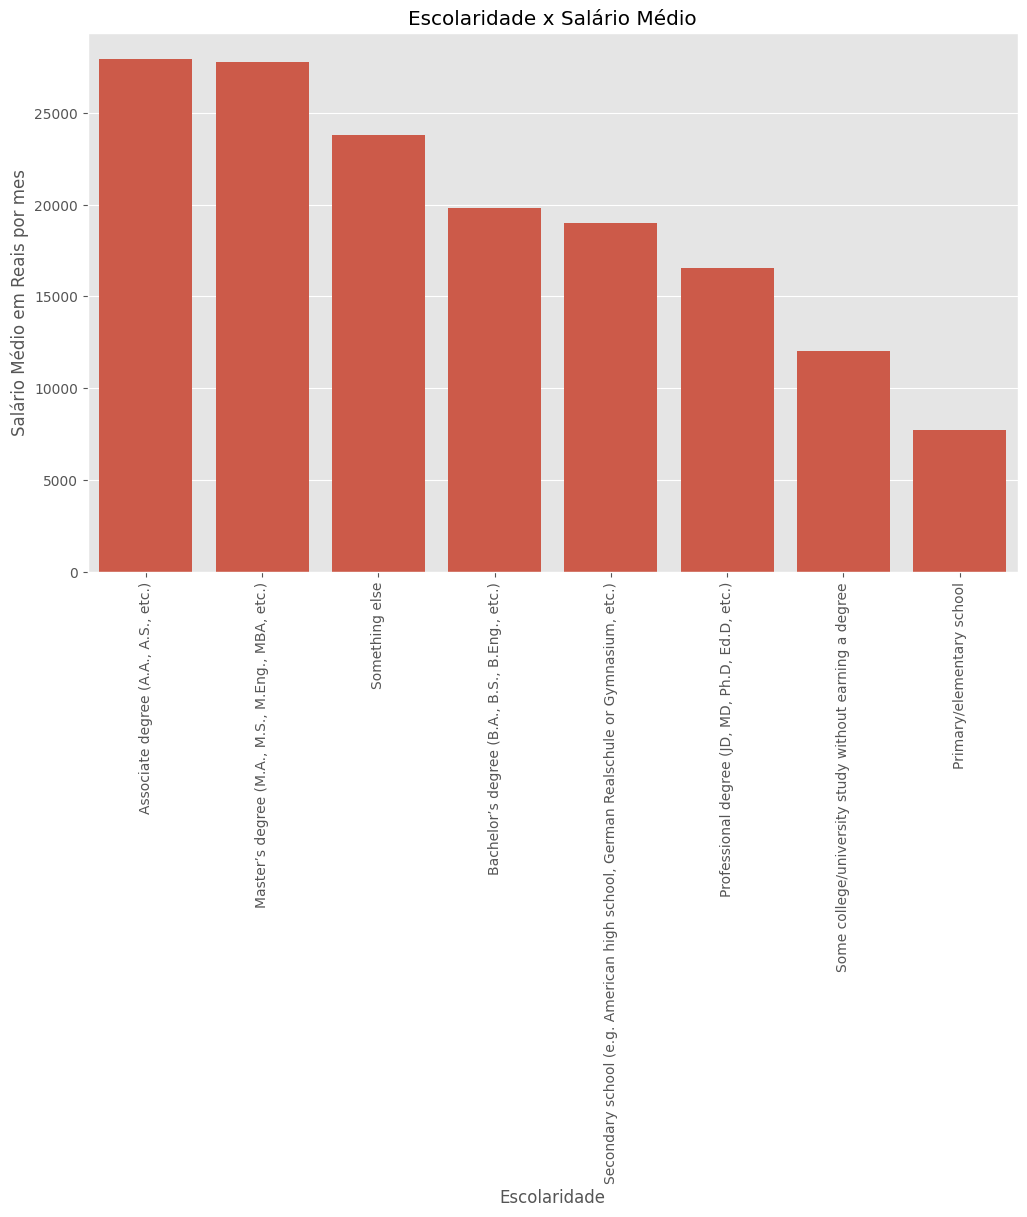

In [39]:
_ = plt.figure(figsize=(12, 7))
_ = plt.title("Escolaridade x Salário Médio")
_ = plt.xlabel("Escolaridade")
_ = plt.ylabel("Salário Médio em Reais por mes")
_ = plt.xticks(rotation=90)
_ = sns.barplot(data = df_escolaridade_por_salario, x = 'escolaridade', y = 'salario_medio_mensal')

Não existe uma correlação clara entre estudo e o salário médio, já que em primeiro lugar está aqueles que possuem o tecnólogo acima de quem possue mestrado por exemplo.

**Por Senioridade**

Filtrando o dataset pela média do salario e contando o total de pessoas.

In [40]:
df_salaries['salario_mensal'] = df_salaries['salario'] / 12
df_senioridade_por_salario = df_salaries.groupby('senioridade').agg({'salario_mensal': 'mean', 'salario': 'count'}).reset_index()
df_senioridade_por_salario = df_senioridade_por_salario.rename(columns={'salario_mensal': 'salario_medio_mensal', 'salario': 'contagem'})
df_senioridade_por_salario = df_senioridade_por_salario.sort_values(by='salario_medio_mensal', ascending=False)
df_senioridade_por_salario

,senioridade,salario_medio_mensal,contagem
3,Sênior,26066.444724,597
2,Pleno,19239.107543,327
1,Não especificado,8177.777778,3
0,Júnior,6637.582988,241


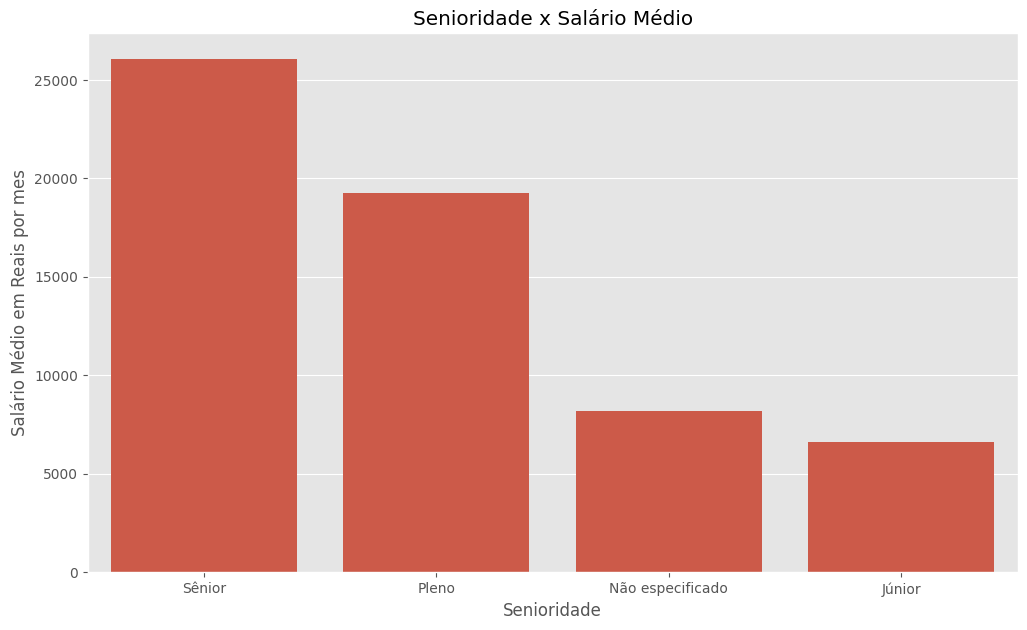

In [41]:
_ = plt.figure(figsize=(12, 7))
_ = plt.title("Senioridade x Salário Médio")
_ = plt.xlabel("Senioridade")
_ = plt.ylabel("Salário Médio em Reais por mes")
_ = sns.barplot(data = df_senioridade_por_salario, x = 'senioridade', y = 'salario_medio_mensal')

Podemos afirmar que existe uma correlação com a senioridade, já que o sênior ganha mais em média, seguido do pleno e do júnior.

**Por Modalidade**

Filtrando o dataset pela média do salario e contando o total de pessoas.

In [42]:
df_salaries['salario_mensal'] = df_salaries['salario'] / 12
df_modalidade_por_salario = df_salaries.groupby('modalidade').agg({'salario_mensal': 'mean', 'salario': 'count'}).reset_index()
df_modalidade_por_salario = df_modalidade_por_salario.rename(columns={'salario_mensal': 'salario_medio_mensal', 'salario': 'contagem'})
df_modalidade_por_salario = df_modalidade_por_salario.sort_values(by='salario_medio_mensal', ascending=False)
df_modalidade_por_salario

,modalidade,salario_medio_mensal,contagem
0,"Hybrid (some remote, some in-person)",34188.882470,251
2,Remote,17158.688725,782
1,In-person,10989.122512,134


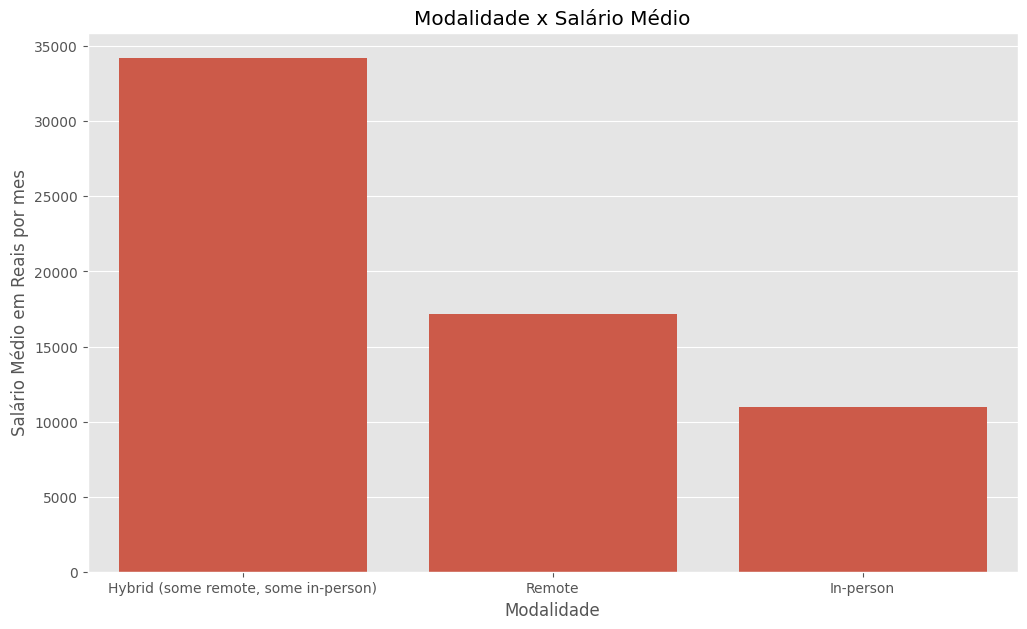

In [43]:
_ = plt.figure(figsize=(12, 7))
_ = plt.title("Modalidade x Salário Médio")
_ = plt.xlabel("Modalidade")
_ = plt.ylabel("Salário Médio em Reais por mes")
_ = sns.barplot(data = df_modalidade_por_salario, x = 'modalidade', y = 'salario_medio_mensal')

As modalidades que mais paga é a híbrida, já a presencial é a que menos paga.